Weather Py - Week 6

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
import datetime

# Incorporated citipy to determine city based on latitude and longitude - 
#credit wingchen/citipy MIT note: only cities with populations over 500 are used

from citipy import citipy

# Import API key
from config import api_key

In [10]:
# List for holding latitude and longitude
# Ins_CitiPy_Demo.ipynb" / adjust size to reach minimum of 500 cities

lats = []
lngs = []

# Create a set of random latitude and longitude combinations 1500 to get to 500

for x in range (0, 1500):
    lats.append(np.random.uniform(-90, 90))
    lngs.append(np.random.uniform(-180, 180))

#print count to confirm
len(lats)

1500

In [11]:
#Create DataFrame to store city and weather data

city_data = {"Latitude":lats, 
                   "Longitude":lngs, 
                   "City Name":"", 
                   "Country":"", 
                   "Temperature (F)":"", 
                   "Humidity %":"", 
                   "Cloudiness %":"", 
                   "Wind Speed":""}

weather_data = pd.DataFrame(city_data)
weather_data.head(5)

,Latitude,Longitude,City Name,Country,Temperature (F),Humidity %,Cloudiness %,Wind Speed
0,76.282388,-65.187269,,,,,,
1,13.350155,-136.833073,,,,,,
2,48.991457,58.720781,,,,,,
3,46.459169,90.488380,,,,,,
4,-50.544347,143.618785,,,,,,


In [12]:
#fill in city and country information into DataFrame - range must match above 1500; lats and lngs vary for graph

#create list to hold city name and country code from citipy

city_name = []
country_code = []

for x in range(0, 1500):
    city_lats = weather_data.loc[x, "Latitude"]
    city_lngs = weather_data.loc[x, "Longitude"]
    city = citipy.nearest_city(city_lats, city_lngs)
    city_name.append(city.city_name)
    country_code.append(city.country_code)
 
weather_data["City Name"] = city_name
weather_data["Country"] = country_code
weather_data

,Latitude,Longitude,City Name,Country,Temperature (F),Humidity %,Cloudiness %,Wind Speed
0,76.282388,-65.187269,narsaq,gl,,,,
1,13.350155,-136.833073,hilo,us,,,,
2,48.991457,58.720781,emba,kz,,,,
3,46.459169,90.488380,altay,cn,,,,
4,-50.544347,143.618785,new norfolk,au,,,,
5,-46.653212,-59.225777,rawson,ar,,,,
6,63.913496,-143.446156,fairbanks,us,,,,
7,-77.457603,-1.892062,hermanus,za,,,,
8,-0.533167,93.487590,meulaboh,id,,,,
9,-85.289008,52.044461,port alfred,za,,,,


In [13]:
# set up lists to hold reponse info "Ins_OpenWeatherDataFrame.ipynb"
temp = []
humidity = []
clouds = []
windspeed = []

In [14]:
# Save config information. "Ins_OpenWeatherDataFrame.ipynb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#set counter
counter = 1

In [15]:
# loop through cities for weather data and insert into Dataframe display "Ins_ExceptionHandling.ipynb" / Ins_OpenWeatherRequest.ipynb
#check for duplicates from previous data and in index counter

for city in city_name:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        temp.append(weather_json["main"]["temp"])
        humidity.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        windspeed.append(weather_json["wind"]["speed"])
        counter = counter + 1
    
    except:
        temp.append(np.nan)
        humidity.append(np.nan)
        clouds.append(np.nan)
        windspeed.append(np.nan)

weather_data["Temperature (F)"] = temp
weather_data["Humidity %"] = humidity
weather_data["Cloudiness %"] = clouds
weather_data["Wind Speed"] = windspeed

if counter%500 == 0: 
        print(f"Submitting request {counter} of 1500")

weather_data = weather_data.dropna(how='any')      
weather_data = weather_data.drop_duplicates("City Name", keep="first")

weather_data

,Latitude,Longitude,City Name,Country,Temperature (F),Humidity %,Cloudiness %,Wind Speed
0,76.282388,-65.187269,narsaq,gl,41.00,65.0,32.0,1.12
1,13.350155,-136.833073,hilo,us,77.74,67.0,20.0,11.41
2,48.991457,58.720781,emba,kz,72.75,68.0,0.0,8.05
3,46.459169,90.488380,altay,cn,40.48,83.0,0.0,2.13
4,-50.544347,143.618785,new norfolk,au,62.60,55.0,20.0,12.75
5,-46.653212,-59.225777,rawson,ar,46.69,79.0,12.0,12.41
6,63.913496,-143.446156,fairbanks,us,53.78,58.0,1.0,3.13
7,-77.457603,-1.892062,hermanus,za,35.35,98.0,0.0,3.58
8,-0.533167,93.487590,meulaboh,id,79.45,100.0,68.0,1.90
9,-85.289008,52.044461,port alfred,za,53.26,100.0,0.0,4.36


In [16]:
#Export the city data into a .csv
weather_data.to_csv("weather_data.csv")
todays_date = datetime.date.today()
print(todays_date)

2018-09-09


#### Latitude vs. Temperature Plot

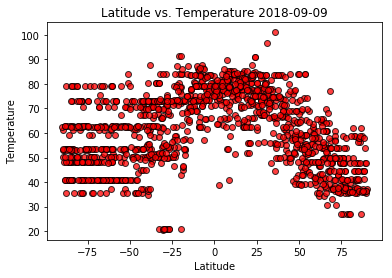

In [17]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. 
#Save the plotted figures as .pngs.
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)

plt.scatter(lats, temp, marker="o", facecolors="red", edgecolors="black", alpha=.75)
plt.title(f"Latitude vs. Temperature {todays_date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig('lattemp.png')
plt.show()

#### Latitude vs. Humidity Plot

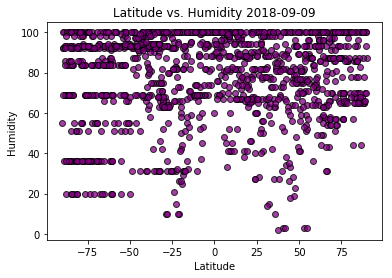

In [18]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. 
#Save the plotted figures as .pngs.
plt.scatter(lats, humidity, marker="o", facecolors="purple", edgecolors="black", alpha=.75)

plt.title(f"Latitude vs. Humidity {todays_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig('lathumid.png')
plt.show()

#### Latitude vs. Cloudiness Plot

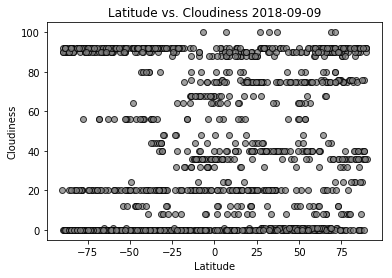

In [19]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. 
#Save the plotted figures as .pngs.
plt.scatter(lats,clouds, marker="o", facecolors="gray", edgecolors="black", alpha=.75)
plt.title(f"Latitude vs. Cloudiness {todays_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig('latcloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

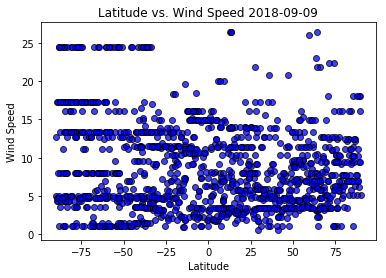

In [20]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. 
#Save the plotted figures as .pngs.
plt.scatter(lats,windspeed, marker="o", facecolors="blue", edgecolors="black", alpha=.75)
plt.title(f"Latitude vs. Wind Speed {todays_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig('latwind.png')
plt.show()

Analysis:

1. There is a consistent pattern of higher humidity near the equator.
2. Due to the time of year, the latitudes north of the equator are experiencing higher temperatures.
3. Wind Speed doesn't follow a discernible pattern.